<a href="https://colab.research.google.com/github/sebastiant93/Reto_Aprendizaje_Supervisado/blob/main/Solucion_Reto_SC_63_Sebastian_Torres_Franco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto | Análisis supervisado**


---


**Presentado por: Sebastián Torres Franco**

**Presentado a: Prof. Luis Eduardo Falcón**

#4) Importación de librerías

Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.

#Conclusión del análisis
Se importan las librerías utilizadas para el reto, y se lee la información en la variable requerida

In [2]:
#**************** Importación de librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, normalize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_percentage_error,confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


#************** Importación de archivo
from google.colab import drive
drive.mount("/content/gdrive")
data=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ArchivosCarga/AprendizajeSupervisado/bank_marketing_RETO_DS_AS.csv")

#Se muestran los encabezados de la variable como prueba de la importación
data.head()


Mounted at /content/gdrive


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


#5) Información de las variables

Obtén la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable y la cantidad de datos perdidos de cada variable en caso de que existan.

#Conclusiones del análisis
Como resumen de la información:
* Se encuentran 16 variables de entrada, de las cuales 9 son categóricas y 7 cuantitativas.
* Se encuentra una variable de salida categórica.
* Se dispone de 9000 registros por característica. No se encuentran campos vacíos en el set de datos.
* Se presenta la estadística descriptiva de las variables categóricas y cuantitativas
* La variable de salida presenta una distribución balanceada dentro de sus catagorías
* Se estudia la matriz de correlación, y no se evidencian valores que permitan sospechar de posible multicolinealidad entre las variables de entrada.
* Se estudian las distribuciones de las variables, y se encuentra que las variables previous, pdays, campaign, duration, balance presentan sesgos hacia la derecha.

In [3]:
#*******************Se inicia verificando la información del dataframe.

print(data.info(),"\n")
#De acuerdo con los resultados:
  #Se tienen 15 variables de entrada (9 categóricas y 6 cuantitativas) y 1 de salida (categórica)
  #Se tienen 9000 registros sin datos faltantes

#*******************Se almacenan los nombres de las variables cuantitativas y categóricas para su descripción

categ_variables=data.dtypes[data.dtypes=="object"].index #Lista de variables categóricas
quant_variables=data.dtypes[data.dtypes!="object"].index #Lista de variables cuantitativas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB
None 



In [4]:
#************Descripción de variables cuantitativas
data[quant_variables].describe() #Se toma el set de variables cuantitativas, y se describen sus estadísticas básicas.

,age,balance,day,duration,campaign,pdays,previous
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,1482.262778,15.619556,353.832778,2.520111,50.511333,0.788889
std,11.664253,3031.013197,8.345305,336.945158,2.737758,107.691963,2.210273
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,109.000000,8.000000,131.000000,1.000000,-1.000000,0.000000
50%,39.000000,519.000000,15.000000,240.500000,2.000000,-1.000000,0.000000
75%,49.000000,1646.500000,21.000000,462.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3253.000000,58.000000,850.000000,58.000000


In [5]:
#*************** Descripción de variables cualitativas
#Se presenta en un dataframe la categoría de cada variable correspondiente a la moda, junto con su conte y porcentaje respecto a la muestra
categ_modes=data[categ_variables].mode() #Se calcula la moda de las variables cuantitativas
mode_counts=[] #Se crea una lista para almacenar el conteo

for col in categ_modes.columns: #Se realiza el conteo de cada variable
    mode_counts.append(data[col].value_counts()[0])

categ_modes.loc[len(categ_modes)]=mode_counts #Se agrega la fila de conteo al dataframe

perc_modes=np.array(mode_counts)*100/data.shape[0] #Se calcula el porcentaje de la moda
categ_modes.loc[len(categ_modes)]=np.round(perc_modes,1) #Se agrega el porcentaje al dataframe
categ_modes.index=["Variable","Conteo","Porcentaje [%]"] #Renombre de índices
categ_modes #Impresión

,job,marital,education,default,housing,loan,contact,month,poutcome,y
Variable,management,married,secondary,no,no,no,cellular,may,unknown,no
Conteo,1999,5124,4486,8865,4564,7820,6438,2361,6783,5213
Porcentaje [%],22.2,56.9,49.8,98.5,50.7,86.9,71.5,26.2,75.4,57.9


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.099976,-0.001442,-0.017784,-0.002394,-0.004835,0.005500
balance,0.099976,1.000000,-0.000035,0.021404,-0.010376,0.017974,0.039162
day,-0.001442,-0.000035,1.000000,-0.020245,0.117186,-0.055465,-0.037357
duration,-0.017784,0.021404,-0.020245,1.000000,-0.037137,-0.038031,-0.018065
campaign,-0.002394,-0.010376,0.117186,-0.037137,1.000000,-0.096286,-0.049395
pdays,-0.004835,0.017974,-0.055465,-0.038031,-0.096286,1.000000,0.501359
previous,0.005500,0.039162,-0.037357,-0.018065,-0.049395,0.501359,1.000000


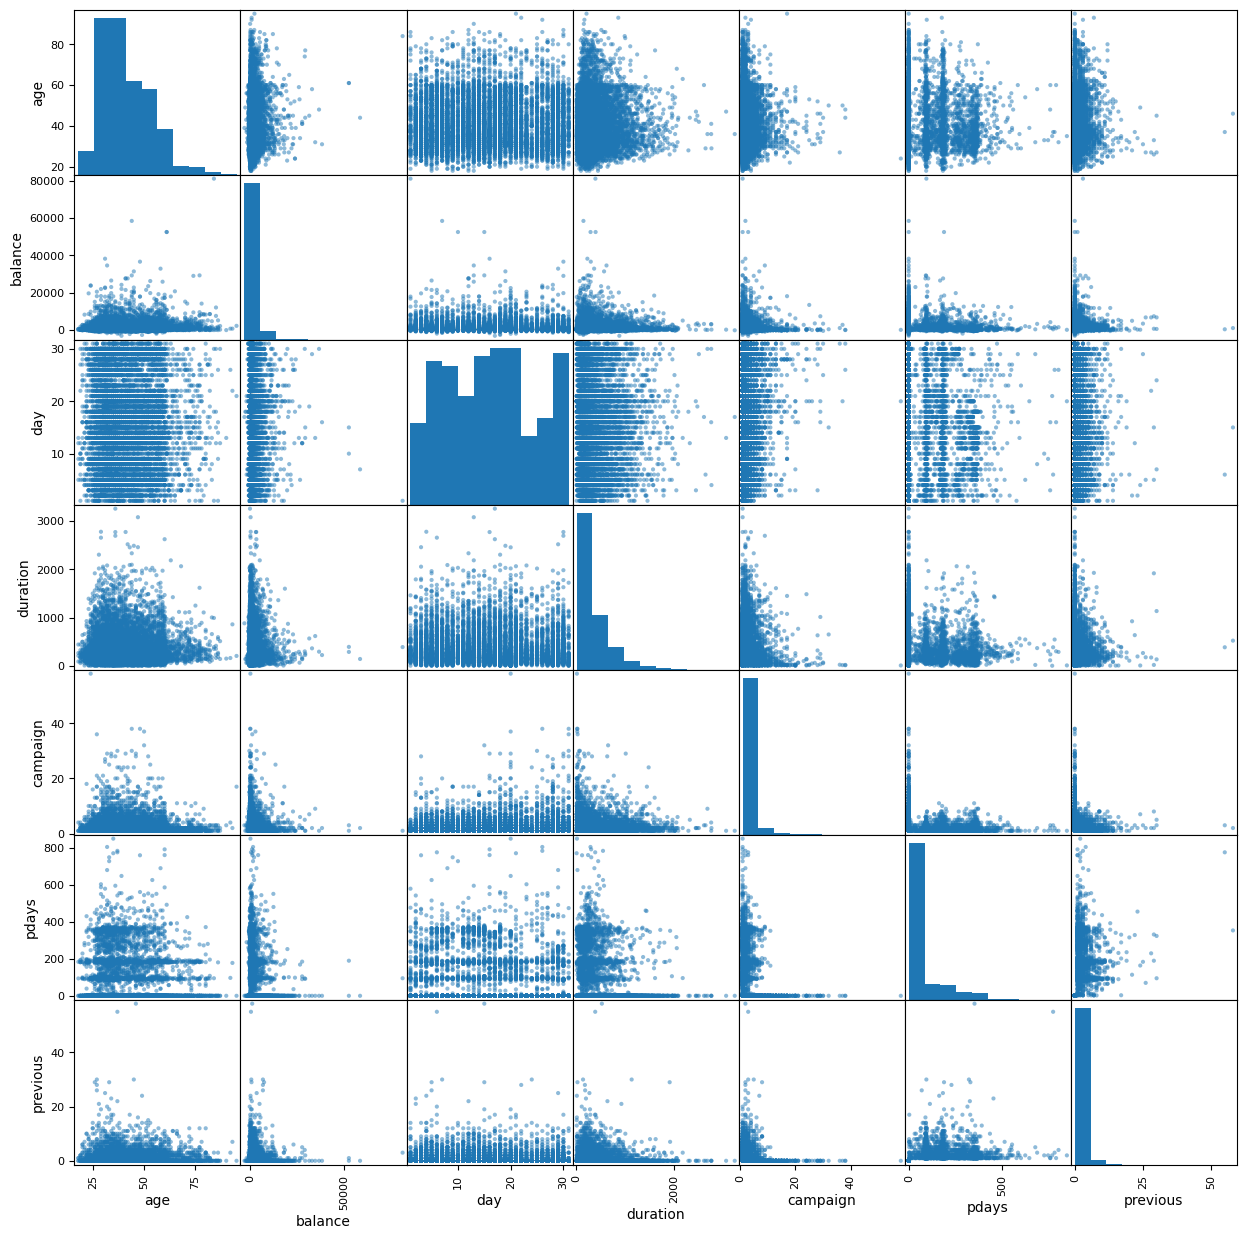

In [6]:
#*************** Estudio de la distribución de las variables
#Se estudia el histograma de las variables cuantitativas para determinar si presentan algún tipo de sesgo
#Para esto se crea una rejilla con los histogramas de las variables
#Se estudian también posibles multicolinealidades mediante los gráficos de dispersión y matriz de correlación
pd.plotting.scatter_matrix(data[quant_variables],figsize=(15,15));

data[quant_variables].corr()

#Como resultado no se aprecia ninguna correlación entre variables que permita sospechar a priori de multicolinealidad.
#Las variables previous, pdays, campaign, duration, balance presentan distribuciones sesgadas.

#6) Transformación de variables
Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

#Conclusiones del análisis

Teniendo en cuenta la cantidad de características categóricas en el dataframe, se opta por usar LabelEncoder, entre otras porque son variables categóricas nominales. Esto permite evitar el incremento en el tamaño del farme de datos que se tendría con OneHotEncoder.

En el caso de las variables eduation y month se usa OrdinalEncoder por tratarse de variables categóricas ordinales, en las cuales hay un "sentido" de orden.

In [7]:
#******************* Procesamiento de la data
data_processed=data.copy() #Se genera una copia del dataframe original para mantener los datos iniciales.

for column in categ_variables: #Se reescriben las columnas categóricas
    if (column != "education") & (column != "month"):  #Para variables nominales se usa LabelEncoder
        data_processed[column]=LabelEncoder().fit_transform(np.ravel(data_processed[[column]]))
    elif column == "month": #Para columna mes se usa OrdinalEncoder
        months=["jan",	"feb",	"mar",	"apr",	"may",	"jun",	"jul",	"aug",	"sep",	"oct",	"nov", "dec"]
        data_processed[column]=OrdinalEncoder(categories=[months]).fit_transform(data_processed[[column]])+1
    else: #Para estudios se usa ordinal Encoder
        studies=["unknown","primary","secondary","tertiary"]
        data_processed[column]=OrdinalEncoder(categories=[studies]).fit_transform(data_processed[[column]])

data_processed.head()    #Se imprime la muestra del resultado.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,1,3.0,0,2666,0,0,0,10,11.0,318,2,97,6,2,1
1,29,10,2,0.0,0,1584,0,0,0,6,9.0,245,1,-1,0,3,1
2,41,1,1,2.0,0,2152,1,0,0,17,11.0,369,1,-1,0,3,0
3,50,1,1,2.0,0,84,1,0,0,17,7.0,18,8,-1,0,3,0
4,40,0,1,2.0,0,0,0,0,0,28,7.0,496,2,182,11,2,1


#7) Transformación de variables numéricas

Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

#Conclusión del análisis
De acuerdo con los histogramas obtenidos en el punto 5 se transforman las variables  previous, pdays, campaign, duration, balance

In [8]:
#********************** Se transforman las variables con logaritmos

num_columns=["previous","pdays","campaign","duration","balance"] #Se almacenan las columnas numéricas a transformar
for column in num_columns:
    x=data_processed[column]
    data_processed[column]=np.log(x+np.abs(np.min(x))+1) #Normalización de la columna

data_processed.head()#Se imprime el encabezado como muestra del resultado


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,1,3.0,0,8.652598,0,0,0,10,11.0,5.774552,1.386294,4.595120,1.945910,2,1
1,29,10,2,0.0,0,8.443116,0,0,0,6,9.0,5.517453,1.098612,0.000000,0.000000,3,1
2,41,1,1,2.0,0,8.558527,1,0,0,17,11.0,5.921578,1.098612,0.000000,0.000000,3,0
3,50,1,1,2.0,0,8.052933,1,0,0,17,7.0,3.091042,2.302585,0.000000,0.000000,3,0
4,40,0,1,2.0,0,8.025843,0,0,0,28,7.0,6.214608,1.386294,5.214936,2.484907,2,1


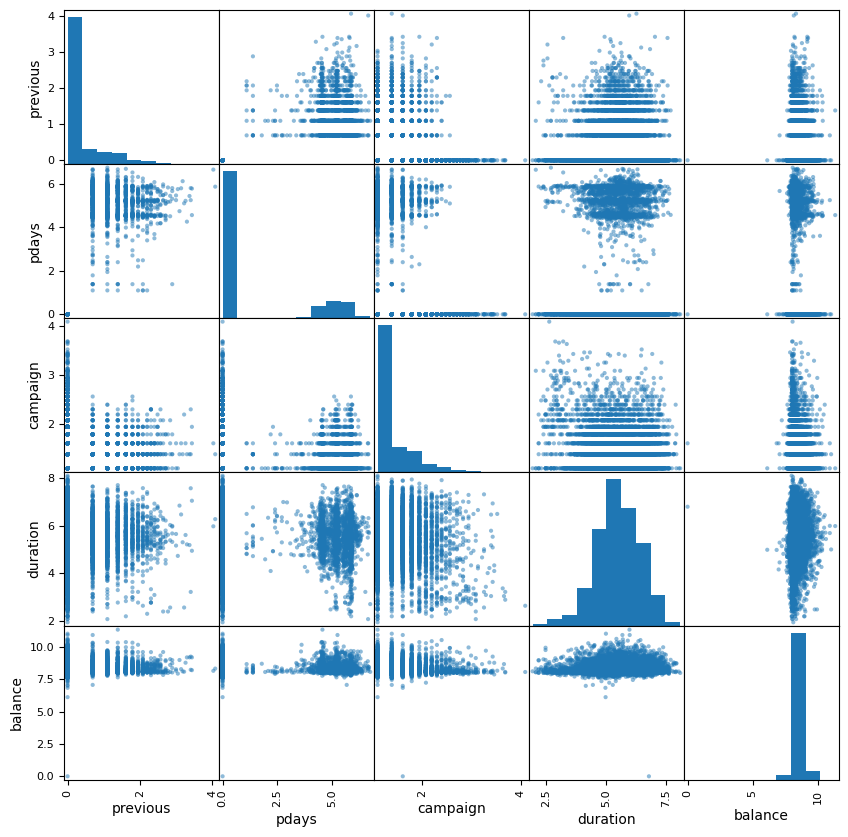

In [9]:
#Se imprime nuevamente la matriz de dispersión e histogramas para verificar las nuevas distribuciones de las variables

pd.plotting.scatter_matrix(data_processed[num_columns],figsize=(10,10));

#8) Variables de salida y de entrada

Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.

#Conclusiones del análisis
Se almacenan las características de entrada en la variable X, y las de salida en la variable Y.

In [10]:
#************** Se crean las variables solicitadas
Y=data_processed.pop("y")
X=data_processed

#Se imprimen los resultados como muestra de cálculo
print("Datos de entrada: \n", X)
print("\n Datos de salida: \n", Y)

Datos de entrada: 
       age  job  marital  education  default   balance  housing  loan  contact  \
0      31    6        1        3.0        0  8.652598        0     0        0   
1      29   10        2        0.0        0  8.443116        0     0        0   
2      41    1        1        2.0        0  8.558527        1     0        0   
3      50    1        1        2.0        0  8.052933        1     0        0   
4      40    0        1        2.0        0  8.025843        0     0        0   
...   ...  ...      ...        ...      ...       ...      ...   ...      ...   
8995   42    1        1        2.0        0  8.123558        1     1        2   
8996   32    1        1        2.0        0  8.174703        1     0        2   
8997   44    7        2        2.0        0  8.690306        0     0        2   
8998   57    7        1        1.0        0  8.174703        1     0        0   
8999   40    9        1        2.0        0  8.230311        1     0        0   

      d

#9) Segregación de variables
Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente

#Conclusión del análisis
Se realiza la segregación de datos requerida.

* Se obtiene cojunto de entrenamiento con 5400 datos.
* Se obtienen conjuntos de validación y prueba con 1800 datos cada uno

In [11]:
#****************** Se realiza la segregación de variables requerida

X_Train, X_Test_and_Validation, Y_Train, Y_Test_and_Validation=train_test_split(X,Y,train_size=0.6,random_state=42) #Segregación del conjunto de entrenamiento
X_Test, X_Validation, Y_Test, Y_Validation=train_test_split(X_Test_and_Validation,Y_Test_and_Validation,train_size=0.5,random_state=42) #Segregación de conjunto de prueba y validación

#***************** Impresión de información de las variables resultantes

print("Datos de Entrenamiento \n X_train: \n",X_Train.shape,"\n Y_train: \n",Y_Train.shape)

print("\n Datos de validación \n X_Validation: \n",X_Validation.shape,"\n Y_Validation: \n",Y_Validation.shape)

print("\n Datos de prueba \n X_Test: \n",X_Test.shape,"\n Y_Test: \n",Y_Test.shape)



Datos de Entrenamiento 
 X_train: 
 (5400, 16) 
 Y_train: 
 (5400,)

 Datos de validación 
 X_Validation: 
 (1800, 16) 
 Y_Validation: 
 (1800,)

 Datos de prueba 
 X_Test: 
 (1800, 16) 
 Y_Test: 
 (1800,)


#10) Aplica el modelo Regresión Logística

Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

#Conclusión del análisis
Se realiza una búsqueda de los mejores parámetros para el modelo logístico dentro de conjuntos propuestos para los argumentos "C", "penalty", y "solver".

Se obtiene que el mejor de los modelos estudiados corresponde a un modelo logístico con C=2,penalty="l2",solver="sag", el cual proporciona una exatitud de 80.2% sobre el set de validación.

In [12]:
#***********************Se realiza un primer ajuste con los parámetros default del modelo para definir un punto de partida

initial_log_model=LogisticRegression(max_iter=3000,random_state=5)
initial_log_model.fit(X_Train,Y_Train)
print("Exactitud sobre set de Entrenamiento: \n ",initial_log_model.score(X_Train,Y_Train))
print("\n Exactitud sobre set de validación: \n ",initial_log_model.score(X_Validation,Y_Validation))


Exactitud sobre set de Entrenamiento: 
  0.8027777777777778

 Exactitud sobre set de validación: 
  0.8016666666666666


In [13]:
#***********************Se ajusta el modelo logístico buscando los mejores parámetros disponibles

#**************** Rangos de hiperparámetros
#Se crea un diccionario de hiperparámetros con las siguientes opciones
    #C: se manejan tres posibles rangos para validar diferentes rangos de regularización.
        # entre 0 y 1
        # entre 1 y 10
        # entre 10 y 30
    #Penalty:
        # l2 para controlar problemas con el entrenamiento
        # elasticnet
        # None
    #Solver:
        # newton-cg
        # saga
        # lbfgs
        #sag

#Se crea el diccionario
params_dic={"C":[0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10,20,30,],"penalty":["l2","elasticnet","None"],"solver":["newton-cg","saga","lbfgs","sag"]}

log_reg=LogisticRegression(max_iter=3000,random_state=5); #Se ajusta el modelo con 3000 iteraciones
log_grid=GridSearchCV(log_reg,params_dic); #Se crea el modelo para selección de mejores parámetros
log_grid.fit(X_Train,np.ravel(Y_Train)); # Se entrena el algoritmo

#Se imprimen los resultados de los mejores parámetros
print("\n Mejores modelos de la búsqueda: \n ",log_grid.best_params_)
print("\n Exactitud sobre conjuto de prueba : \n ",log_grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
520 fits failed out of a total of 780.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol


 Mejores modelos de la búsqueda: 
  {'C': 2, 'penalty': 'l2', 'solver': 'sag'}

 Exactitud sobre conjuto de prueba : 
  0.8022222222222222


Exactitud sobre set de entrenamiento: 
  0.8038888888888889

 Exactitud sobre set de validación: 
  0.7944444444444444


Text(0.5, 1.0, 'Matriz de confusión modelo logístico en set de Validación')

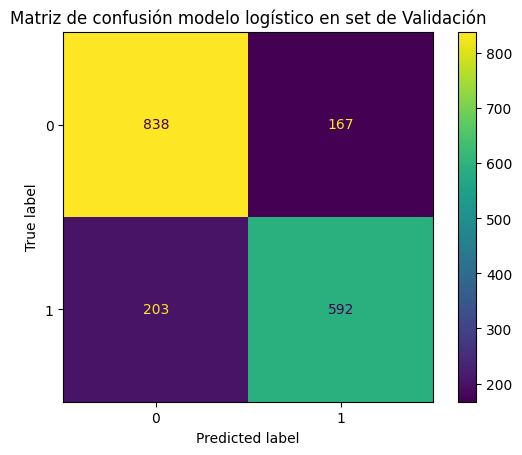

In [14]:
#*********************** Se ajusta el modelo a los parámetros obtenidos para el mejor ajuste.
final_log_model=LogisticRegression(C=2,penalty="l2",solver="sag",max_iter=3000,random_state=5)
final_log_model.fit(X_Train,Y_Train)
print("Exactitud sobre set de entrenamiento: \n ",final_log_model.score(X_Train,Y_Train))
print("\n Exactitud sobre set de validación: \n ",final_log_model.score(X_Validation,Y_Validation))

#Se genera la matriz de confusión
prediction_log=final_log_model.predict(X_Validation)
conf_matrix_log=ConfusionMatrixDisplay(confusion_matrix(Y_Validation,prediction_log))
conf_matrix_log.plot()
plt.title("Matriz de confusión modelo logístico en set de Validación")

#11) Modelo Red Neuronal

Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

#Conclusiones del análisis

Se aplica un modelo neuronal de clasificación de dos capas ocultas con la misma cantidad de neuronas. Para esto se evaluaron 5 escenarios de valores para alpha (0.15,0.3,0.5,0.7,1). Para cada caso de alpha se validó la posibilidad de usar los pares entre 2 y 28 neuronas en cada capa. De acuerdo con lo anterior, se estudió un total de 60 modelos

Aunque en todos los casos se obtuvieron modelos factibles que no presentaron subentrenamientos, ni sobrentrenamientos, se escoge el escenario de C=0.3 con 18 neuronas por presentar los mejores resultados.

Al final, se presenta la matriz de confusión del modelo.


 ************************* Resultados con alpha = 0.15 ************************************ 

> 2 ... 	 trainacc: 0.583, 	 validacc: 0.558, 	 loss_train: 0.417, 	 loss_valid: 0.442
> 4 ... 	 trainacc: 0.808, 	 validacc: 0.806, 	 loss_train: 0.192, 	 loss_valid: 0.194
> 6 ... 	 trainacc: 0.806, 	 validacc: 0.804, 	 loss_train: 0.194, 	 loss_valid: 0.196
> 8 ... 	 trainacc: 0.803, 	 validacc: 0.801, 	 loss_train: 0.197, 	 loss_valid: 0.199
> 10 ... 	 trainacc: 0.807, 	 validacc: 0.8, 	 loss_train: 0.193, 	 loss_valid: 0.2
> 12 ... 	 trainacc: 0.811, 	 validacc: 0.802, 	 loss_train: 0.189, 	 loss_valid: 0.198
> 14 ... 	 trainacc: 0.81, 	 validacc: 0.804, 	 loss_train: 0.19, 	 loss_valid: 0.196
> 16 ... 	 trainacc: 0.824, 	 validacc: 0.81, 	 loss_train: 0.176, 	 loss_valid: 0.19
> 18 ... 	 trainacc: 0.811, 	 validacc: 0.811, 	 loss_train: 0.189, 	 loss_valid: 0.189
> 20 ... 	 trainacc: 0.826, 	 validacc: 0.815, 	 loss_train: 0.174, 	 loss_valid: 0.185
> 22 ... 	 trainacc: 0.841, 	 validac

Text(0, 0.5, 'Error [%]')

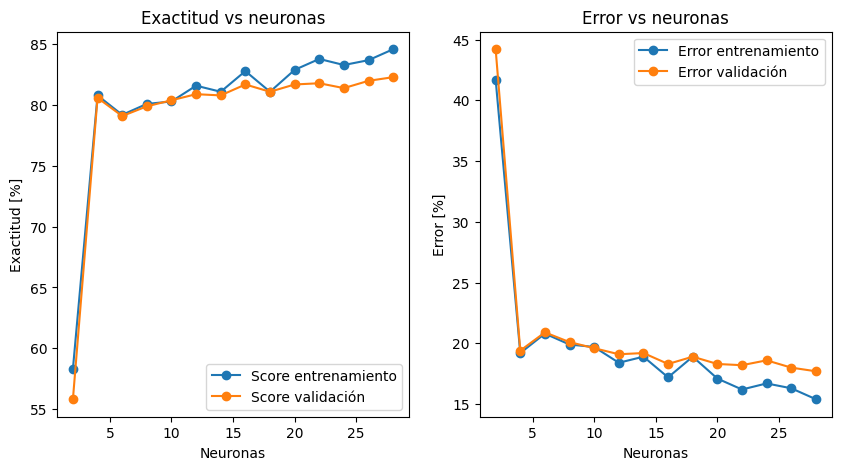

In [15]:
#*************************************** Se genera el modelo de red neuronal usando varios set de neuronas en dos capas

#Se realizan varios experimentos con valores de alpha para evitar casos de sobrentrenamiento y subentrenamiento


def neural_val_Alpha(X_Train,Y_Train,X_validation,Y_validation,alpha):
#Descripción:
  #Función encargada de evaluar un modelo mlp de clasificación sobre un set de datos de entrenamiento y validación ante una constante alpha

#Argumentos & Variables:
  # X_Train: Set variables independientes de entrenamiento
  # Y_Train: Set variables dependientes de entrenamiento
  # X_validation: Set variables independientes de validación
  # Y_validation: Set variables dependientes de validación
  # alpha: Constante alpha

#Variables retornadas
  # train_score: Exactitud del modelo sobre set de entrenamiento
  # train_error: Error del modelo sobre set de entrenamiento
  # validation_score: Exactitud del modelo sobre set de validación
  # validation_error: Error del modelo sobre set de validación

    neuronas=[i for i in range(2,30,2)] #Lista con la cantidad de neuronas
    train_error, train_score = list(), list()
    validation_error, validation_score = list(), list()

    for i in neuronas:
        mlp_model=MLPClassifier(hidden_layer_sizes=(i,i),alpha=alpha,random_state=42,max_iter=3000) #Ahora, en el caso contrario, volveremos muy grandes los términos de la regularización

        #Entrenamos sobre el set de entrenamiento
        mlp_model.fit(X_Train,Y_Train)
        yhat_train=mlp_model.predict(X_Train)#Realizamos la predicción sobre el conjunto de entrenamiento
        train_loss=np.round(np.mean(np.abs(yhat_train-Y_Train)),3) #Almacenamos el error absoluto promedio entre los datos
        train_error.append(train_loss) #Almacenamos el error promedio de los datos
        train_acc=np.round(1-train_loss,3)
        train_score.append(train_acc) #Complemento del error

        #Predecimos sobre el set de validación
        yhat_validation=mlp_model.predict(X_validation)#Realizamos la predicción sobre el conjunto de prueba
        validation_loss=np.round(np.mean(np.abs(yhat_validation-Y_validation)),3) #Almacenamos el error absoluto promedio entre los datos
        validation_error.append(validation_loss) #Almacenamos el error promedio de los datos
        validation_acc=np.round(1-validation_loss,3)
        validation_score.append(validation_acc) #Complemento del error

        #Impresión de los resultados de cada iteración

        print(f"> {i} ... \t trainacc: {train_acc}, \t validacc: {validation_acc}, \t loss_train: {train_loss}, \t loss_valid: {validation_loss}")

    return train_score, train_error, validation_score, validation_error

print("\n ************************* Resultados con alpha = 0.15 ************************************ \n")
alpha=0.15
neural_val_Alpha(X_Train,Y_Train,X_Validation,Y_Validation,alpha)

print("\n ************************* Resultados con alpha = 0.3 ************************************ \n")
alpha=0.3
train_score, train_error, validation_score, validation_error= neural_val_Alpha(X_Train,Y_Train,X_Validation,Y_Validation,alpha)

print("\n ************************* Resultados con alpha = 0.5 ************************************ \n")
alpha=0.5
neural_val_Alpha(X_Train,Y_Train,X_Validation,Y_Validation,alpha)

print("\n ************************* Resultados con alpha = 0.7 ************************************ \n")
alpha=0.7
neural_val_Alpha(X_Train,Y_Train,X_Validation,Y_Validation,alpha)

print("\n ************************* Resultados con alpha = 1 ************************************ \n")
alpha=0.1
neural_val_Alpha(X_Train,Y_Train,X_Validation,Y_Validation,alpha)


#****************** Se muestran las curvas de aprendizaje del modelo
#Curva de exactitud
fig=plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.plot(range(2,30,2),np.array(train_score)*100,label="Score entrenamiento",marker="o")
plt.plot(range(2,30,2),np.array(validation_score)*100,label="Score validación",marker="o")
plt.legend()
plt.title("Exactitud vs neuronas")
plt.xlabel("Neuronas")
plt.ylabel("Exactitud [%]")

#Curva de error
fig.add_subplot(122)
plt.plot(range(2,30,2),np.array(train_error)*100,label="Error entrenamiento",marker="o")
plt.plot(range(2,30,2),np.array(validation_error)*100,label="Error validación",marker="o")
plt.legend()
plt.title("Error vs neuronas")
plt.xlabel("Neuronas")
plt.ylabel("Error [%]")


#12) Selecciona el mejor modelo
Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.

#Conclusión del análisis

Se escoge el modelo comparando la exactitud que prentó el modelo logístico ajustado vs el modelo neuronal sobre el set de prueba. A pesar de presentar exactitudes similares, se escoge el modelo neuronal por ser levemente más exacto.

Exactitud modelo logístico sobre set de prueba:  0.795
Exactitud modelo mlp sobre set de prueba:  0.8011111111111111

 Porcentajes de la matriz de confusión: 
 [[49.33333333  9.44444444]
 [10.44444444 30.77777778]]


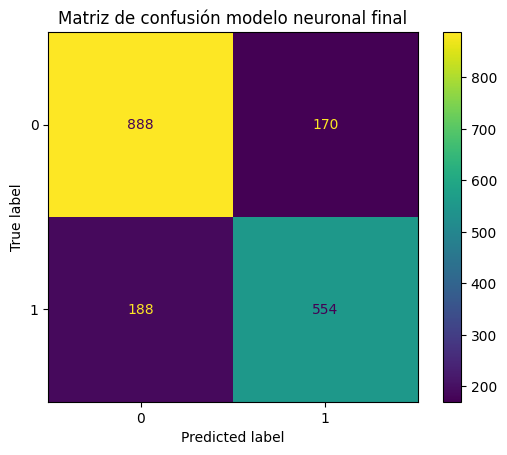

In [19]:
#Se escoge el modelo MLP con 18 neuronas y alpha= 0.3,
final_neural_model=MLPClassifier(hidden_layer_sizes=(18,18),alpha=0.3,max_iter=3000,random_state=42)
final_neural_model.fit(X_Train,Y_Train)

#Para la selección del modelo óptimo se verifica la exactitud sobre el set de prueba
print("Exactitud modelo logístico sobre set de prueba: ",final_log_model.score(X_Test,Y_Test))
print("Exactitud modelo mlp sobre set de prueba: ",final_neural_model.score(X_Test,Y_Test))

#Se escoge el modelo mlp y se grafica su matriz de confusión
pred_final_mlp=final_neural_model.predict(X_Test)
conf_plot=ConfusionMatrixDisplay(confusion_matrix(Y_Test,pred_final_mlp))
conf_plot.plot()
plt.title("Matriz de confusión modelo neuronal final");

print("\n Porcentajes de la matriz de confusión: \n", confusion_matrix(Y_Test,pred_final_mlp) * 100 /Y_Test.shape[0]);


#13) Conclusiones del estudio

Con la finalidad de estudiar el posible resultado de la camapaña de telemarketing impulsada por el banco, se ha desarrollado un modelo de aprendizaje supervisado que permitirá predecir qué tan bien responderan los usuarios a la campaña de acuerdo con las características que le sean definidas.

Para la elaboración del modelo se tomó información de 9000 registros existentes, y se estudio la posibilidad de implementar dos modelos clásicos para este tipo de problemas. El modelo logístico de clasificación, y el modelo neuronal de clasificación.

Los modelos fueron entrenados usando el 60% de los registros, y también se realizó la selección de parámetros adecuados usando un conjunto de validación del 20% de los registros.

Finalmente, la exactitud de los modelos fue comparada sobre el 20% restante de los registros, usados como set de prueba el 20% restante de los datos. De los resultados se obtuvo que el modelo neuronal presentó una mejor exactitud (80%). Esto quiere decir que se espera que el modelo pueda predecir si el cliente reaccionará de forma positiva o negativa a la campaña con un 80% de exactitud.

En relación al error del modelo, existe una posibilidad del 10.4% de que el modelo prediga que un cliente hará un depósito cuando en realidad no lo haría, y un 9.4% de probabilidad de que el modelo prediga que el cliente no hará el depósito cuando en realidad sí lo haría.

Una conclusión de la aplicación de los modelos de aprendizaje supervisado en campañas de mercadotecnia, es que permiten el diseño adecuado de una campaña. Es decir, si se tiene un modelo bien entrenado, la empresa podría proponer diferentes tipos de campañas, y veririficar cuáles de estas pueden llegar a tener respuestas positivas de los clientes mediante los resultados del algoritmo. Esto permite que la impresa dedique su inversión y esfuerzo en campañas apropiadas, y no que lo pierda en camapañas potencialmente infructuosas.
